# Librerias

In [2]:
#Importemos las librerias Necesarias:
import scipy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import random

In [3]:
from sklearn.utils import *
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.preprocessing import *
from sklearn.feature_selection import *
from sklearn.neural_network import MLPClassifier as MLPC

***

In [4]:
# Creemos los nombres de las columnas:
cols = [i+1 for i in range(64)]
cols.append('num')

In [5]:
#carguemos los datos de test:
df_test = pd.read_csv('Data/optdigits.tes', sep=',', names=cols)
df_test.head()

,1,2,3,4,5,6,7,8,9,10,...,56,57,58,59,60,61,62,63,64,num
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


In [6]:
# Carguemos los datos de Trian:
df_train = pd.read_csv('Data/optdigits.tra', sep=',', names=cols)
df_train.head()

,1,2,3,4,5,6,7,8,9,10,...,56,57,58,59,60,61,62,63,64,num
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


## **Analicemos la informacion antes de nada:**<br/>
nos vasta con analizar uno de los df ya que ambos son iguales.<br/>
sabemos que las variables pertenecen todas al rango 0, 16 por la infromacion obtenida en el fichero .name

In [7]:
df_train.describe()

,1,2,3,4,5,6,7,8,9,10,...,56,57,58,59,60,61,62,63,64,num
count,3823.0,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,...,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000
mean,0.0,0.301334,5.481821,11.805912,11.451478,5.505362,1.387392,0.142297,0.002093,1.960502,...,0.148313,0.000262,0.283024,5.855872,11.942977,11.461156,6.700497,2.105676,0.202197,4.497253
std,0.0,0.866986,4.631601,4.259811,4.537556,5.613060,3.371444,1.051598,0.088572,3.052353,...,0.767761,0.016173,0.928046,4.980012,4.334508,4.991934,5.775815,4.028266,1.150694,2.869831
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,10.000000,9.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,5.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,5.000000,13.000000,13.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,10.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,15.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,5.000000,15.000000,...,12.000000,1.000000,10.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


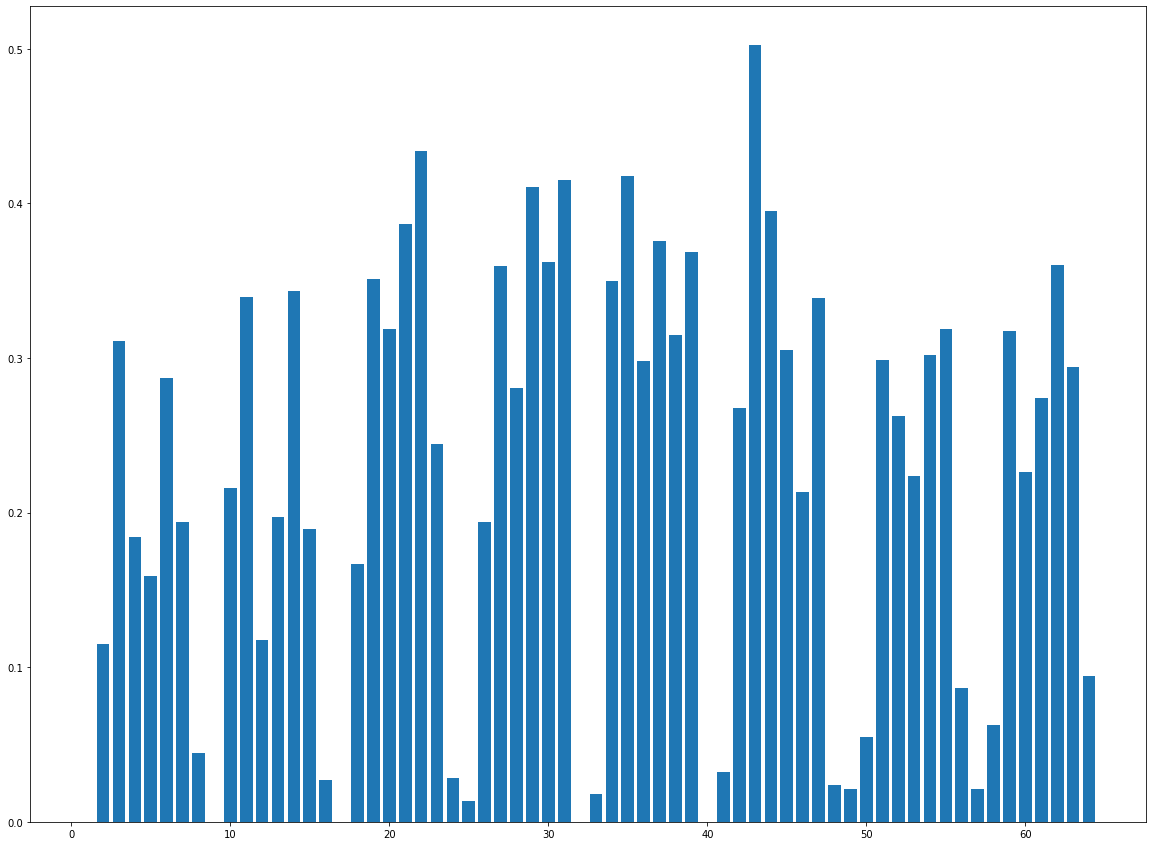

In [8]:
# Veamos si podemos reducir la dimensaionalidad:
seed = random.seed(time.time())

X = df_train.drop(cols[-1], axis=1)
y = df_train[cols[-1]]
cls = mutual_info_classif(X, y, random_state=seed)

plt.figure(figsize=(20,15))
plt.bar(cols[:-1], cls)
plt.show()

In [9]:
# una vez visto el gráfico, se ve que hay variables que realmente aportan muy poco al problema:
for i in range(len(cls)):
    if cls[i] < 0.15:
        df_test = df_test.drop(cols[i], axis=1)
        df_train = df_train.drop(cols[i], axis=1)
        
cols = df_train.columns

df_train.head()

,3,4,5,6,7,10,11,13,14,15,...,52,53,54,55,59,60,61,62,63,num
0,6,15,12,1,0,7,16,6,10,0,...,9,15,9,0,6,14,7,1,0,0
1,10,16,6,0,0,7,16,16,5,0,...,8,10,15,3,10,16,15,3,0,0
2,8,15,16,13,0,1,11,11,16,1,...,16,4,0,0,9,14,0,0,0,7
3,0,3,11,16,0,0,5,11,13,7,...,3,16,0,0,0,1,15,2,0,4
4,5,14,4,0,0,0,13,0,0,0,...,8,4,11,12,4,12,14,7,0,6


Dado que los valores de las variables están normalizados entre 0 y 16, no se realizará ninguna otra operacion.

## Entrenemos el modelo:

In [10]:
X_train, y_train = df_train.drop(cols[-1], axis=1), df_train[cols[-1]]
X_test, y_test = df_test.drop(cols[-1], axis=1), df_test[cols[-1]]

In [30]:
# creemos el modelo:
model = MLPC(
    hidden_layer_sizes=(100,),
    activation='tanh', # ‘identity’, ‘logistic’, ‘tanh’, ‘relu’
    solver='sgd',  # ‘lbfgs’, ‘sgd’, ‘adam’
    learning_rate='constant', # ‘constant’, ‘invscaling’, ‘adaptive’
    max_iter=1000
)
model.fit(X_train, y_train)


MLPClassifier(activation='tanh', max_iter=1000, solver='sgd')

In [31]:
y_pred = model.predict(X_test)

Balanced Accuracy Score: 0.9596955469271805  Accuracy: 0.9588202559821926


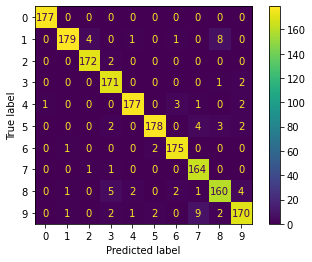

In [32]:
bacc = balanced_accuracy_score(y_pred, y_test)
acc = accuracy_score(y_pred, y_test)
cm = confusion_matrix(y_pred, y_test)
print(f'Balanced Accuracy Score: {bacc}  Accuracy: {acc}')
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

Con los hiperparametros configurados de la siguiente forma:<br/>
   > hidden_layer_sizes=(50,),<br/>
   > activation='logistic',<br/>
   > solver='sgd',<br/>
   > learning_rate='constant',<br/>
   
Se ha conseguido el siguiente resultado:<br/>
   > Balanced Accuracy Score: 0.9579273405686989  Accuracy: 0.9560378408458542

Establecio los ajustes en:
> hidden_layer_sizes=(100,),<br/>
   > activation='tanh',<br/>
   > solver='sgd',<br/>
   > learning_rate='constant',<br/>
   
Se ha conseguido el siguiente resultado:<br/>
   > Balanced Accuracy Score: 0.9596955469271805  Accuracy: 0.9588202559821926

Lo cual supone un ligero aumento de la precision.<br/>
Pese a tod la mejora es de orden reducido por lo que se entiende que por mucho que se pretenda ajustar los hiperparametros no llegaremos a un resultado sustancialmente mejor


****

# Notas:

> Nota 1

# Bibliografia:

   * Elemento bibliografico 1
   * Elemento bibliografico 2